### Project: Material Surface defect classification using CNN and SVM

**Data set Link** : https://www.kaggle.com/arunrk7/surface-crack-detection



### Importing all the libraries required for the classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

import numpy as np
import cv2
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing import image

import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.3.0'

### **Part 1 - Data Preprocessing**

In [2]:
train_path = 'C:/Users/hp/Desktop/ML_Project/Paddy/train_images'
test_path =  'C:/Users/hp/Desktop/ML_Project/Paddy/test_images'

In [3]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set=train_datagen.flow_from_directory(train_path,target_size = (64, 64), batch_size = 32, class_mode='categorical')

Found 7777 images belonging to 10 classes.


In [4]:
training_set.class_indices

{'bacterial_leaf_blight': 0,
 'bacterial_leaf_streak': 1,
 'bacterial_panicle_blight': 2,
 'blast': 3,
 'brown_spot': 4,
 'dead_heart': 5,
 'downy_mildew': 6,
 'hispa': 7,
 'normal': 8,
 'tungro': 9}

In [5]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32,class_mode = 'categorical')

Found 2630 images belonging to 10 classes.


In [6]:
def image_read(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    #plt.show()

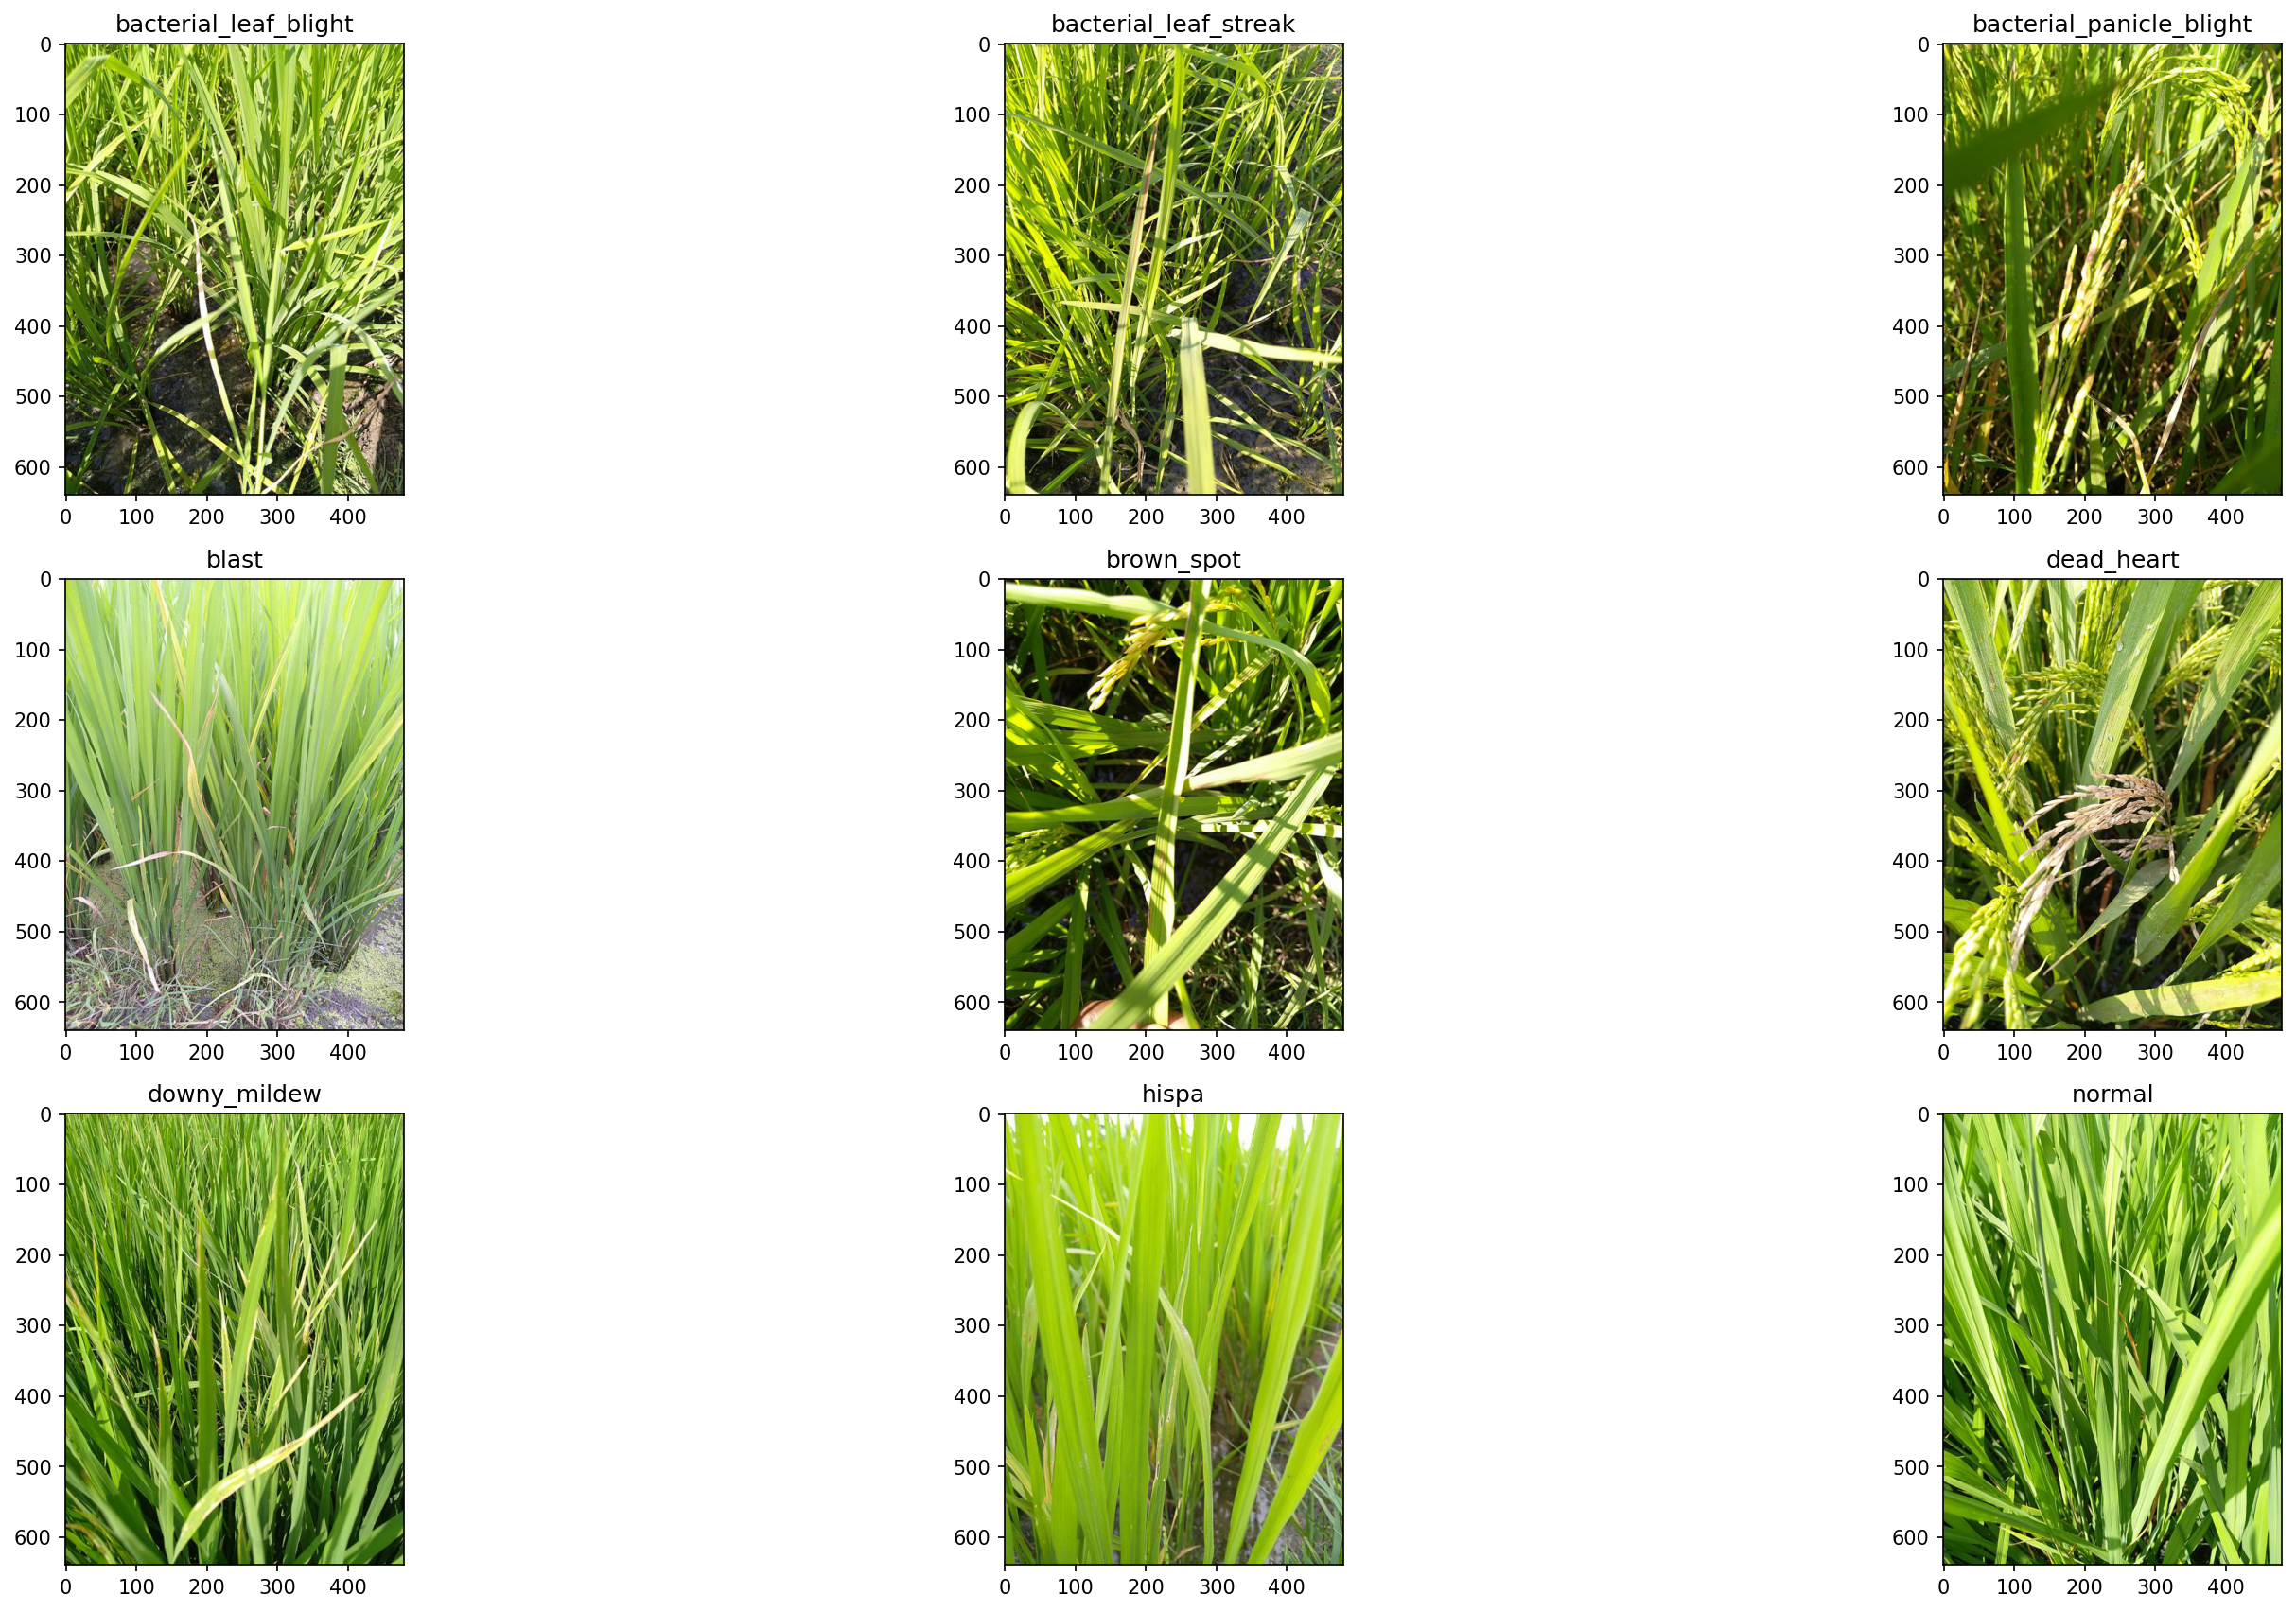

In [7]:
plt.figure(figsize=(20,15),dpi=150)

plt.subplot(431)
plt.title('bacterial_leaf_blight')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/bacterial_leaf_blight/103033.jpg')

plt.subplot(432)
plt.title('bacterial_leaf_streak')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/bacterial_leaf_streak/100081.jpg')

plt.subplot(433)
plt.title('bacterial_panicle_blight')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/bacterial_panicle_blight/103406.jpg')

plt.subplot(434)
plt.title('blast')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/blast/102881.jpg')

plt.subplot(435)
plt.title('brown_spot')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/brown_spot/100975.jpg')

plt.subplot(436)
plt.title('dead_heart')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/dead_heart/103388.jpg')

plt.subplot(437)
plt.title('downy_mildew')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/downy_mildew/102640.jpg')

plt.subplot(438)
plt.title('hispa')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/hispa/103176.jpg')

plt.subplot(439)
plt.title('normal')
image_read('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/normal/103109.jpg')

plt.tight_layout()

In [8]:
image = cv2.imread('C:/Users/hp/Desktop/ML_Project/Paddy/train_images/normal/103109.jpg')
image.shape

(640, 480, 3)

In [9]:
image.max()

255

### **Note:** 
* **If image is not 3 dimensional, We need to reshape all the images (3--->( 640, 480, 3)  color channel if image is color, 1--->  (640, 480, 1)  color channel if image is gray)** 

### **Part 2 - Building the CNN**

In [10]:
# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))

# Step 5 - Output Layer

## For Binary Classification
cnn.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

## for mulitclassification
# cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))

In [12]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

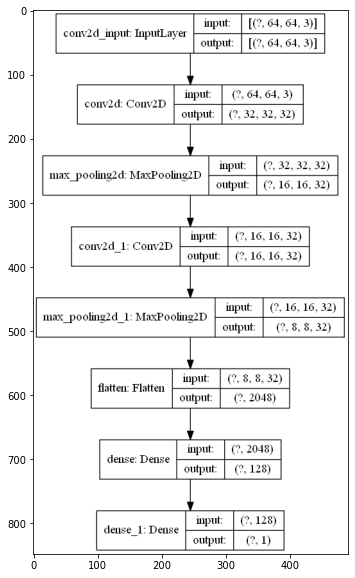

In [9]:
plot_model(cnn, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(40,10))
imgplot = plt.imshow(img)

### **Part 3 - Training the CNN**

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
244/244 [==============================] - 876s 4s/step - loss: 2.0941 - accuracy: 0.2684 - val_loss: 1.8974 - val_accuracy: 0.3665
Epoch 2/40
244/244 [==============================] - 861s 4s/step - loss: 1.8435 - accuracy: 0.3665 - val_loss: 1.7885 - val_accuracy: 0.4186
Epoch 3/40
244/244 [==============================] - 836s 3s/step - loss: 1.7024 - accuracy: 0.4247 - val_loss: 1.6660 - val_accuracy: 0.4578
Epoch 4/40
244/244 [==============================] - 844s 3s/step - loss: 1.5759 - accuracy: 0.4642 - val_loss: 1.7981 - val_accuracy: 0.4144
Epoch 5/40
244/244 [==============================] - 844s 3s/step - loss: 1.4760 - accuracy: 0.5119 - val_loss: 1.4767 - val_accuracy: 0.5156
Epoch 6/40
244/244 [==============================] - 855s 4s/step - loss: 1.3495 - accuracy: 0.5542 - val_loss: 1.3180 - val_accuracy: 0.5753
Epoch 7/40
244/244 [==============================] - 833s 3s/step - loss: 1.2577 - accuracy: 0.5905 - val_loss: 1.3363 - val_accuracy: 0.5681

In [11]:
accuracy = r.history['accuracy'][-1]
print('Accuracy:', accuracy)

Accuracy: 0.8923749327659607


**Plotting Training and Validation accuracies and losses**

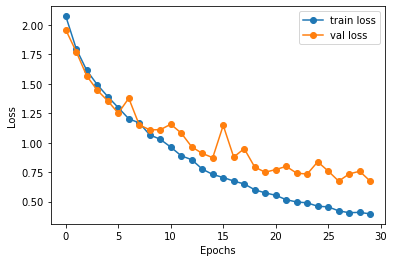

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss',marker='o')
plt.plot(r.history['val_loss'], label='val loss',marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

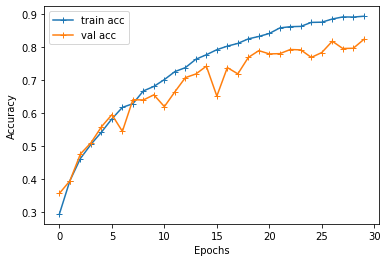

In [35]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc',marker='+')
plt.plot(r.history['val_accuracy'], label='val acc',marker='+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Part 4 - Finding Model performance**

**Finding Confusion Matrix**

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32,class_mode = 'categorical',
                                          shuffle=False)

nb_train_samples = 7777
nb_validation_samples = 2630

#Confution Matrix and Classification Report
Y_pred = cnn.predict(test_set, nb_validation_samples // 16+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Found 2630 images belonging to 10 classes.
Confusion Matrix
[[ 84   2   1   9   6   1   7   7  15   8]
 [  0  64   1   1   1   0   1   0   2   0]
 [  5   1  76   4   3   8   6   2   1   4]
 [  2   2   3 439  12   4   4   4   9  21]
 [  2   0   1   2  81   1   1   0   7   5]
 [  7   1   2  14   4 387   2   2  14   7]
 [  2   2   1   6   5   1 137   2  15   9]
 [  9   3   1  18   4  10  16 337  51  21]
 [  1   1   1  15   3   1   2  13 472  11]
 [  0   2   0   4   3   0   1   2   3  85]]


In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(test_path, target_size = (64, 64), batch_size = 32,class_mode = 'categorical',
                                          shuffle=False)

nb_train_samples = 7777
nb_validation_samples = 2630

#Confution Matrix and Classification Report
Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Found 2630 images belonging to 10 classes.
Confusion Matrix
[[ 84   2   1   9   6   1   7   7  15   8]
 [  0  64   1   1   1   0   1   0   2   0]
 [  5   1  76   4   3   8   6   2   1   4]
 [  2   2   3 439  12   4   4   4   9  21]
 [  2   0   1   2  81   1   1   0   7   5]
 [  7   1   2  14   4 387   2   2  14   7]
 [  2   2   1   6   5   1 137   2  15   9]
 [  9   3   1  18   4  10  16 337  51  21]
 [  1   1   1  15   3   1   2  13 472  11]
 [  0   2   0   4   3   0   1   2   3  85]]


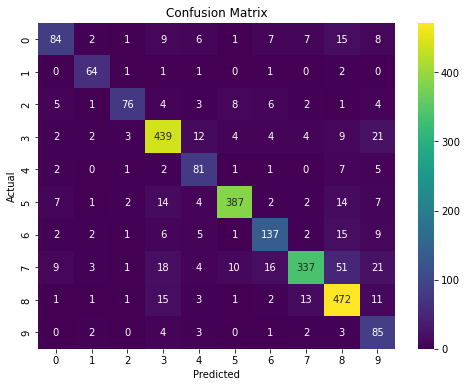

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt='g', vmin=0, cmap='viridis', cbar=True);

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [19]:
print('Classification Report:\n----------------------\n')
print(classification_report(test_set.classes, y_pred))

Classification Report:
----------------------

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       140
           1       0.82      0.91      0.86        70
           2       0.87      0.69      0.77       110
           3       0.86      0.88      0.87       500
           4       0.66      0.81      0.73       100
           5       0.94      0.88      0.91       440
           6       0.77      0.76      0.77       180
           7       0.91      0.72      0.80       470
           8       0.80      0.91      0.85       520
           9       0.50      0.85      0.63       100

    accuracy                           0.82      2630
   macro avg       0.79      0.80      0.79      2630
weighted avg       0.84      0.82      0.82      2630



### **Part 5 - Making a single prediction to check whether trained model is performing correctly**

In [13]:
image_path = 'C:/Users/hp/Desktop/ML_Project/Paddy/test_images/normal/100065.jpg'
test_image = image.load_img(image_path , target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result = np.argmax(result, axis=1)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

if result[0] == 0:
    print("'Bacterial_leaf_blight'")
elif result[0]==1:
    print('Bacterial_leaf_streak')
elif result[0]==2:
    print('Bacterial_panicle_blight')
elif result[0]==3:
    print('Blast')
elif result[0]==4:
    print('Brown_spot')
elif result[0]==5:
    print('Dead_heart')
elif result[0]==6:
    print('Downy_mildew')
elif result[0]==7:
    print('Hispa')
elif result[0]==8:
    print('Normal')
elif result[0]==9:
    print('Tungro')
else:
    print('Confused..Not Getting')

NameError: name 'cnn' is not defined

### **Part 6 - Saving Final Model for deployment**
**Based on Classification report and Confusion Matrix, if we find that the model is performing well, we can save the model for deployment and can be used for related application**

In [22]:
# save it as a h5 file
from tensorflow.keras.models import load_model
cnn.save('model_paddy_disease.h5')
# load model
#from tensorflow.keras.models import load_model
#model = load_model('model_rPositive_Negative.h5')

-----
## Thank You.....